In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos
from numpy import sin
import os
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [37]:
Temperature_deg = 22 #Degrees C 
Pressure= 101325 #Pa

Temperature_kelvin = Temperature_deg + 273 #K
rho = Pressure / (Temperature_kelvin * 287) #Kg/m^3 (You need to enter the formula to determine density from pressure and temperature with gas constant)
rho

L=265
X=L/2

In [38]:
def turbulent_bl(y, delta, n):
    return (y/delta)**(1/n)
    
def laminar_bl(y, delta):
    frac = (y/delta)
    return frac * (2-frac)

def find_re(u, c, nu):
    return u*c/nu

def natplotlib(x, y, label, black=False):
    """
    takes in 2 arrays consisting of [data, axis label]. There is also a label for the line
    """
    
    plt.axhline(linewidth=1.5, color="grey")        
    plt.axvline(linewidth=1.5, color="grey")
    if black:
        plt.plot(x[0], y[0], label=label, marker="x", linestyle="--", color="black")
    else:
        plt.plot(x[0], y[0], label=label, marker="x", linestyle="--")
    plt.grid()
    plt.legend()
    plt.xlabel(x[1])
    plt.ylabel(y[1])

measured boundary layer is 7.685080666151702mm
empirical estimations say its about 7.631632912379854mm
hermann schlichtig says 4.344771583090738mm


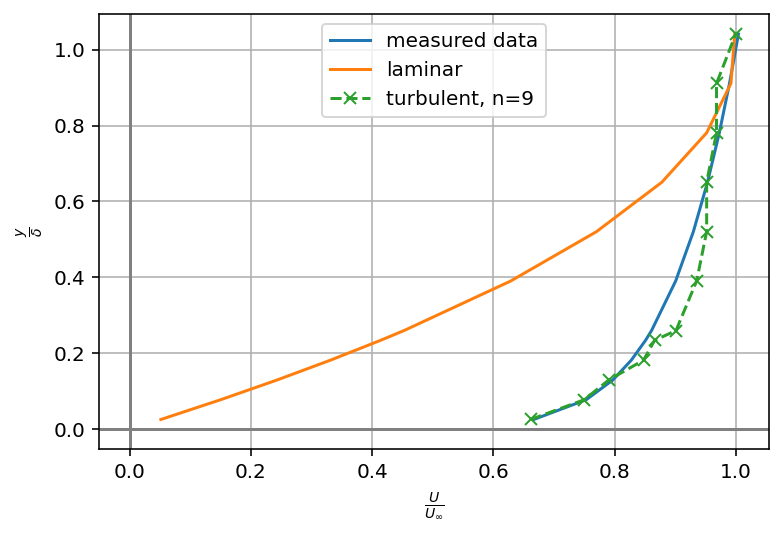

In [57]:
data1 = pd.read_csv("ReL400k_full_plate.csv")
a,b = data1.columns
y = data1[a]
u = data1[b]
ReL = 400e3
u_inf = u.max()
delta = np.interp(0.99, u/u_inf, y)

idx = np.where(y/delta >= 1)[0][1] # what does this do

y1 = y[:idx]/(delta)
u1 = u[:idx]/u_inf

n = 9

analytical1=[turbulent_bl(y, 1, n) for y in y1]
plt.plot(analytical1, y1, label="measured data")
plt.plot([laminar_bl(y, 1) for y in y1], y1, label = "laminar")
natplotlib([u1, r"$\frac{U}{U_\infty}$"], [y1, r"$\frac{y}{\delta}$"], label=f"turbulent, n={n}")

print(f"measured boundary layer is {delta}mm")
print(f"empirical estimations say its about {0.38*L/(ReL**(1/5))}mm") 
nu = (1.825e-5)/rho
frac = nu/u_inf
otherfrac = ReL/np.log(ReL)
print(f"hermann schlichtig says {frac*0.14*otherfrac*1e3*1.5}mm")

#importnat link maybe?? https://www.me.psu.edu/cimbala/me320web_Spring_2015/pdf/Flat_plate_turbulent_BL.pdf

plt.savefig(f"boundary layer {ReL}.png", dpi=500)

for the $Re_L = 400k$ plate, the turbulent boundary layer obviously fits better

displacement thickness $\frac{\delta*}{\delta} = \int^\delta_0 (1-\frac{u}{U_\infty}) d\frac{y}{\delta}$
numerical integration gives $\frac{\delta*}{\delta} = 0.1$

In [22]:
data_displacement1 = np.trapz((1-u1), y1)*delta
print(f"integrating the data gives {data_displacement1}mm displacement thickness")
analytical_displacement1 = np.trapz(1-np.array([turbulent_bl(y, 1, n) for y in y1]), y1)*delta
print(f"integrating analytically gives {analytical_displacement1}mm displacement thickness")
estimation_displacement1 = L*0.048/(ReL**(1/5))
print(f"empirical estimations say {estimation_displacement1}mm")

integrating the data gives 0.635878560555569mm displacement thickness
integrating analytically gives 0.6945209174138441mm displacement thickness
empirical estimations say 0.9639957363006132mm


momentum thickness $\frac{\theta}{\delta} = \int_0 ^\delta \frac{u}{U_\infty}(1-\frac{u}{U_\infty}) d\frac{y}{\delta}$, numerical integration gives

In [23]:
data_momentum1 = np.trapz(u1*(1-u1), y1)*delta
print(f"integrating the data gives {data_momentum1}mm momentum thickness")

integrating the data gives 0.5391214394444324mm momentum thickness


In [24]:
print(f"shape factor is {data_displacement1/data_momentum1}")

shape factor is 1.179471848143983


measured boundary layer is 3.8451668522645215mm
empirical estimations say its about 8.766444172391969mm for turbulent
or perchance 2.9094598489238517


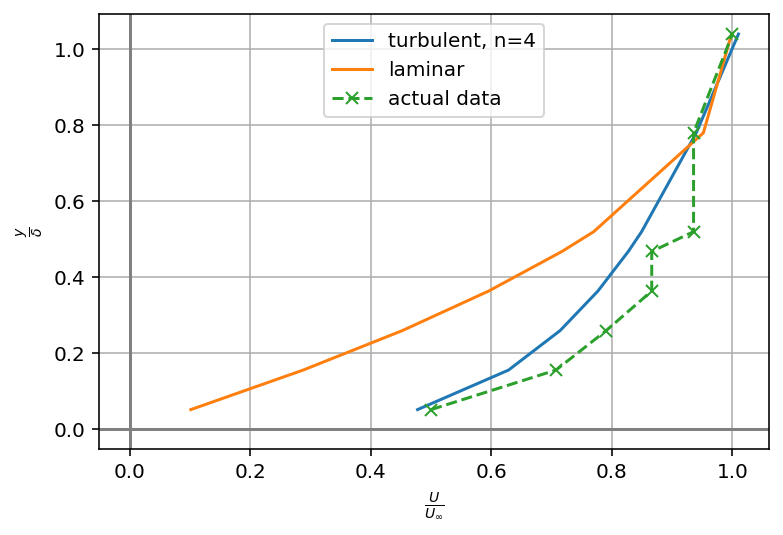

In [55]:
data2 = pd.read_csv("ReL200k_full_plate.csv")
ReL = 200e3
a,b = data2.columns
y = data2[a]
u = data2[b]

u_inf = u.max()
delta = np.interp(0.99, u/u_inf, y)

idx = np.where(y/delta >= 1)[0][1]

y2 = y[:idx]/delta
u2 = u[:idx]/u_inf

n = 4


plt.plot([turbulent_bl(y, 1, n) for y in y2], y2, label=f"turbulent, n={n}")
plt.plot([laminar_bl(y, 1) for y in y2], y2, label = "laminar")
natplotlib([u2, r"$\frac{U}{U_\infty}$"], [y2, r"$\frac{y}{\delta}$"],"actual data")

print(f"measured boundary layer is {delta}mm")
print(f"empirical estimations say its about {0.38*L/(ReL**(1/5))}mm for turbulent")
print(f"or perchance {4.91*L/(ReL**0.5)}")

plt.savefig(f"boundary layer {ReL} full.png", dpi=500)

In [26]:
displacement_integral = np.trapz((1-u2), y2)*delta
print(f"integrating the data gives {displacement_integral}mm displacement thickness")
print(f"integrating analytically gives {0.1*delta}mm displacement thickness")

integrating the data gives 0.4980487841498597mm displacement thickness
integrating analytically gives 0.38451668522645216mm displacement thickness


In [27]:
momentum_integral = np.trapz(u2*(1-u2), y2)*delta
print(f"integrating the data gives {momentum_integral}mm momentum thickness")

integrating the data gives 0.3769512158501407mm momentum thickness


In [28]:
print(f"shape factor is {displacement_integral/momentum_integral}")

shape factor is 1.3212552797491497


measured boundary layer is 3.365039685039537mm
empirical estimations say its about 4.3832220861959845mm


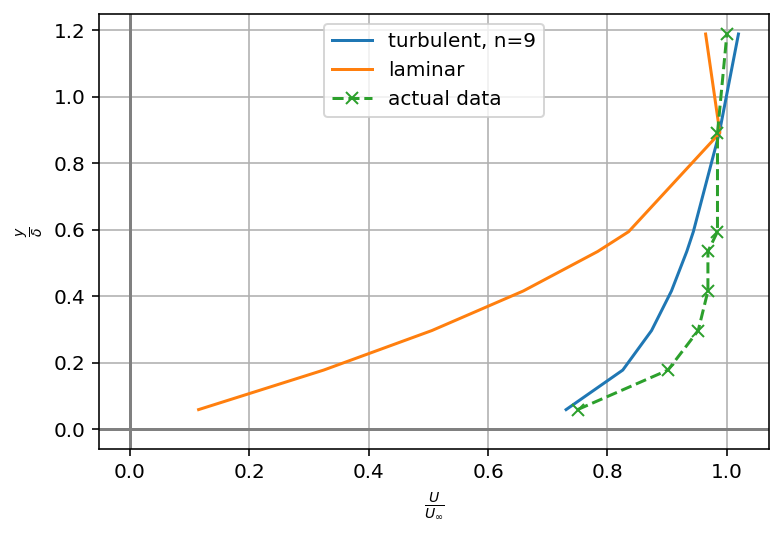

In [59]:
data3 = pd.read_csv("Rex200k_half_plate.csv")
ReL = 200e3
a,b = data3.columns
y = data3[a]
u = data3[b]

u_inf = u.max()
delta = np.interp(0.99, u/u_inf, y)

idx = np.where(y/delta >= 1)[0][1]

y3 = y[:idx]/delta
u3 = u[:idx]/u_inf

n = 9

plt.plot([turbulent_bl(y, 1, n) for y in y3], y3, label=f"turbulent, n={n}")
plt.plot([laminar_bl(y, 1) for y in y3], y3, label = "laminar")
natplotlib([u3, r"$\frac{U}{U_\infty}$"], [y3, r"$\frac{y}{\delta}$"],"actual data")

print(f"measured boundary layer is {delta}mm")
print(f"empirical estimations say its about {0.38*X/(ReL**(1/5))}mm") 

plt.savefig(f"boundary layer {ReL} half.png", dpi=500)

measured boundary layer is 1.7380667409058077mm
empirical estimations say its about 5.034999999999999mm


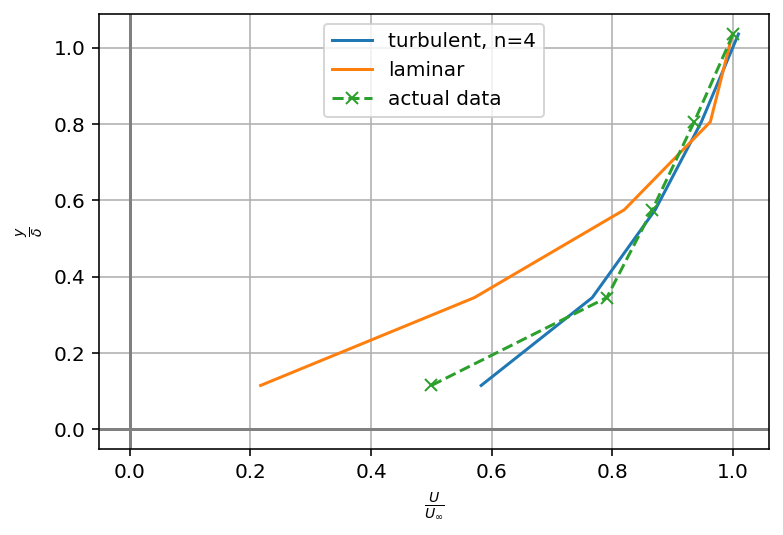

In [60]:
data4 = pd.read_csv("Rex100k_half_plate.csv")
ReL = 100e3
a,b = data4.columns
y = data4[a]
u = data4[b]

u_inf = u.max()
delta = np.interp(0.99, u/u_inf, y)

idx = np.where(y/delta >= 1)[0][1]

y4 = y[:idx]/delta
u4 = u[:idx]/u_inf

n = 4

plt.plot([turbulent_bl(y, 1, n) for y in y4], y4, label=f"turbulent, n={n}")

plt.plot([laminar_bl(y, 1) for y in y4], y4, label = "laminar")
natplotlib([u4, r"$\frac{U}{U_\infty}$"], [y4, r"$\frac{y}{\delta}$"],"actual data")

print(f"measured boundary layer is {delta}mm")
print(f"empirical estimations say its about {0.38*X/(ReL**(1/5))}mm") 

plt.savefig(f"boundary layer {ReL}.png", dpi=500)

In [31]:
a,b = data4.columns
y = data4[a]
u = data4[b]

In [32]:
u_inf = u.max()

In [33]:
find_re(u_inf, X, (1.825e-5)/rho)

99296690.82719405

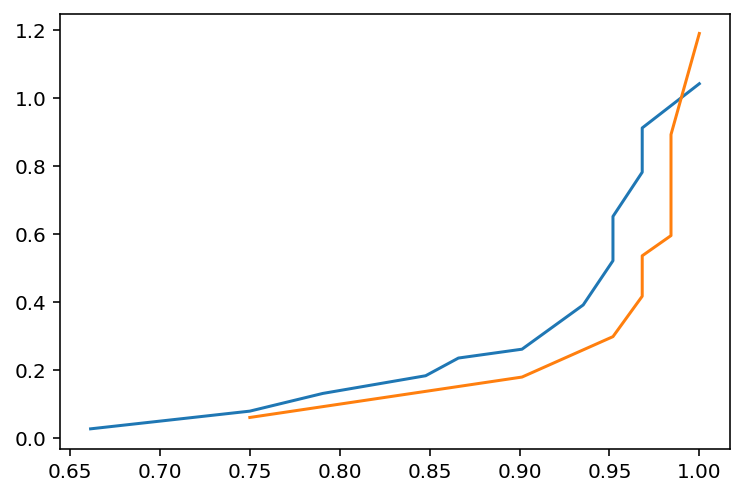

In [34]:
plt.plot(u1, y1)
plt.plot(u3, y3)

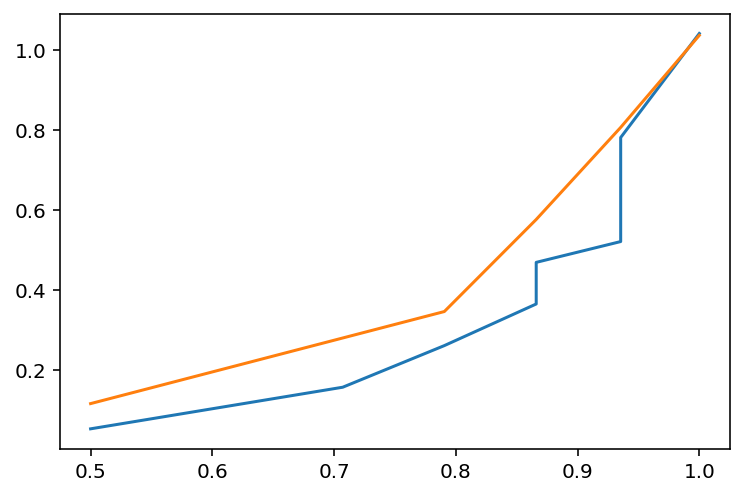

In [35]:
plt.plot(u2, y2)
plt.plot(u4, y4)

In [64]:
X * 4.91/(np.sqrt(100e3))

2.0572987887640433

In [66]:
data_displacement1 = np.trapz((1-u3), y3)*delta
data_momentum1 = np.trapz(u3*(1-u3), y3)*delta
data_displacement1/data_momentum1

1.1337652033891443

In [67]:
data_displacement1 = np.trapz((1-u4), y4)*delta
data_momentum1 = np.trapz(u4*(1-u4), y4)*delta
data_displacement1/data_momentum1

1.4089462971188205